# Physics 344: Assignment 4
Answer the following questions in this notebook using Python code, together with appropriate discussions and calculations in Markdown cells.

**Student Name:** Ryan Shearer

**Student Number:** 24695394

In [1]:
# https://numpy.org/doc/stable/reference/random/generator.html
# https://docs.scipy.org/doc/scipy/reference/integrate.html


#are we sampling directly from pi to intialize X0?
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.special import binom
rng=np.random.default_rng()

def AutoCorrelationFunction(x,klist,mean=None):
    if mean is None:
        xp=x-np.mean(x)
    else:
        xp=x-mean
    var=np.mean(xp**2)
    acf=[1. if k==0 else np.sum(xp[k:]*xp[:-k])/len(x)/var for k in klist]
    return np.array(acf)

## Question 1

### Background
 In class we introduced Markov chain Monte Carlo for a finite state space $S$. For infinite state spaces some of the definitions become more technical, but the overall approach, and the Metropolis algorithm, continue to work in essentially the same way. Consider the case where $S=\mathbb{R}$, and let $\pi(x)$ be a probability density on $S$. To generate elements of $S$ according to $\pi(x)$ we can use the Metropolis algorithm to define a type of random walk on $S$, with stationary distribution $\pi(x)$. Suppose the chain is in state $X_n=x$ at time $n$. We then propose a transition to the state $x'=x+\delta x$ where $\delta x$ is generated according to a probability density $p(\delta x)$ which is even around zero. This evenness ensures that the proposal probability density $P_{x'\leftarrow x}$ is symmetric. The proposed step from $x$ to $x'$ is then accepted with probability $A_{x'\leftarrow x}={\rm min}(1,\pi(x')/\pi(x))$, in which case we set $X_{n+1}=x'$. If the proposed step is rejected, we set $X_{n+1}=x$. The resulting Markov chain is guaranteed to have $\pi(x)$ as a stationary distribution. However, the ergodicity of the chain, and the convergence rate of the algorithm, will depend on the choice of $p(\delta x)$, i.e. on how the proposed steps are generated.

 Consider the following concrete example. Let $\pi(x)=(1/2)g_1(x)+(1/2)g_2(x)$ with $g_1(x)=N(\mu=-2,\sigma=1/2)$ and $g_2(x)=N(\mu=2,\sigma=1/2)$ be a mixture of two Gaussian distributions. To generate proposals for the step $\delta x$ we use the uniform distribution $p=U(-a,a)$, where $a$ sets the maximum step size. We want to investigate how the choice of $a$ impacts on the (effective) ergodicity of the chain and the autocorrelation time of the state of the chain. Remember that we defined the autocorrelation function of an observable $f:S\rightarrow\mathbb{R}$ as $$\rho(k)=\rho(f(X_n),f(X_{n+k})),$$ where the $\rho$ on the right is the correlation coefficient. For the present example $X_n$ is already real-valued, and so we can consider the autocorrelation function $\rho(k)=\rho(X_n,X_{n+k})$ of the state of the chain directly. (So, in the random walk language, $\rho(k)$ is the autocorrelation function of the walker's position.) Typically we expect $\rho(k)$ to be positive and to decay exponentially to zero as $\rho(k)\approx e^{-k/\tau_x}$. Here $\tau_x$ is the autocorrelation time of the chain's state, i.e. roughly the number of time steps after which the chain would "forget" its current state.  
 
 To estimate the autocorrelation function from the data (being a partial realization $\{x_0,x_1,x_2,\ldots,x_{N-1}\}$ of the Markov chain), we use the *sample autocorrelation* 
 $$\bar{\rho}(k)=\frac{1}{s^2_N}\frac{1}{N}\sum_{n=0}^{N-k-1}(x_n-m_N)(x_{n+k}-m_N),$$
 where $m_N=\frac{1}{N}\sum_{n=0}^{N-1}x_n$ and $s^2_N=\frac{1}{N}\sum_{n=0}^{N-1}(x_n-m_N)^2$ are the usual sample mean and sample variance. Note that in the expression for $\bar{\rho}(k)$ the prefactor contains $1/N$, rather than the expected $1/(N-k)$. This yields more stable results when $k$ is of the order of $N$, but should not effect the result when $k\ll N$, which is usually the case we are interested in. 

 To estimate the autocorrelation time $\tau_x$ from $\bar{\rho}(k)$ we will make use of the following simple approach, which remains useful even if $\bar{\rho}(k)$ does not follow an exact exponential decay. Provided that $N$ is large enough, $\bar{\rho}(k)$ should be a decreasing function of $k$, at least for $k\ll N$. We then define our estimate $\bar{\tau}_x$ of the autocorrelation time as the smallest value of $k$ for which $\bar{\rho}(k)\leq e^{-1}$.

### Coding Instructions

Write the following functions:

**GenerateChain(N,a):** This simulates the Markov chain for $N$ steps using $p=U(-a,a)$, and starting with a state $x_0$ generated according to the stationary distribution $\pi(x)$. In this way we eliminate the equilibration phase. This function should return a numpy array containing the first $N$ states of the chain. **Note:** *Constructing long arrays by appending elements one-by-one is extremely slow, and should always be avoided. Rather generate the array for storing the chain's states beforehand (using np.zeros, for example), and then update the entries during the simulation.*

**AutoCorrelationFunction(x,klist,mean) (Already provided above)**: Calculates the sample autocorrelation for an array $x$ for the values of $k$ in klist. The third argument is optional, and specifies the value of $m_N$ to use in the definition above. If omitted, $m_N$ will be the sample mean calculated from $x$.

**GeneratePlots(N,a,K):** This should produce the following three plots based on data generated using the previous two functions:

**Plot 1:** $x_n$ versus $n$ for $n=0,\ldots,N-1$. Fix the vertical plot range to $(-5,5)$.

**Plot 2:** A histogram showing the empirical distribution of the chain's states, together with a curve corresponding to the stationary distribution $\pi(x)$.

**Plot 3:** $\bar{\rho}(k)$ versus $k$ for $k=0,1,\ldots,K-1$. Include two curves, one where $m_N$ is the sample mean, and the other where $m_N$ is taken as zero. The reason for including both curves is that the sample mean could be very different from zero, which is the true expectation value $E_\pi(X_n)=0$ of the chain's state in the stationary distribution. We know that as $N\rightarrow\infty$ the sample mean should therefore converge to zero, but this may happen extremely slowly, leading to a very poor estimate of $\rho(k)$. Since we know that $E_\pi(X_n)=0$ here, we use this knowledge to obtain a better estimate of $\rho(k)$. We include the result when $m_N$ is the sample mean as well, since this is what we would be forced to use if the true value of $E_\pi(X_n)$ is not known.

Include somewhere on your plots the value of $a$. Also, include the estimates $\bar{\tau}_x$ for the the autocorrelation time $\tau_x$ based on the calculations of $\bar{\rho}(k)$ for the two choices of $m_N$.

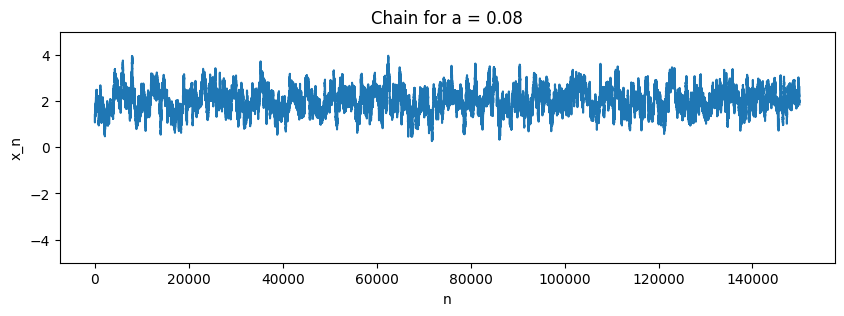

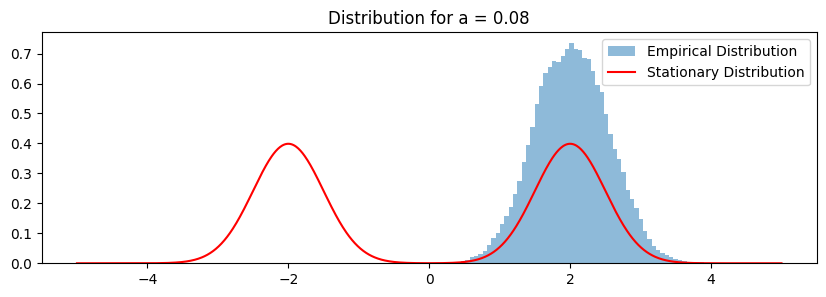

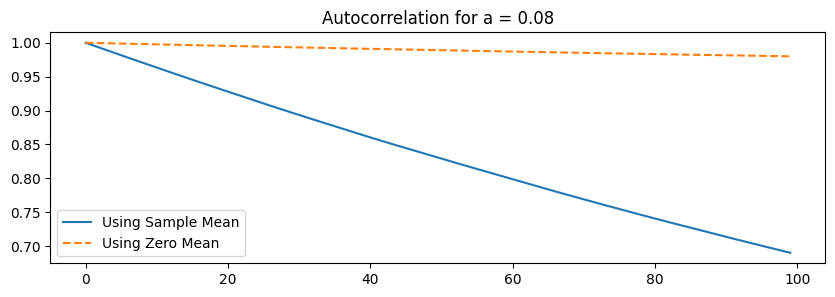

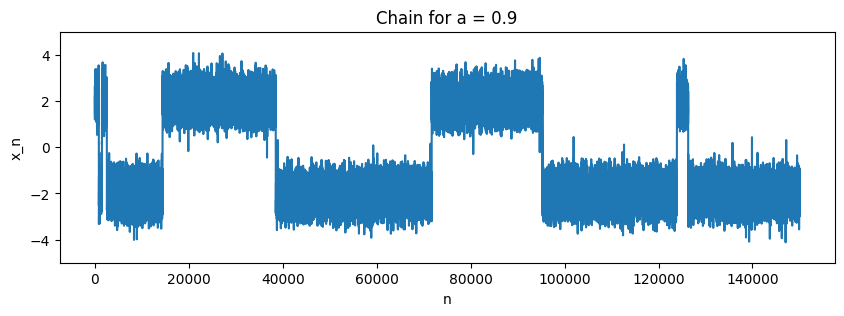

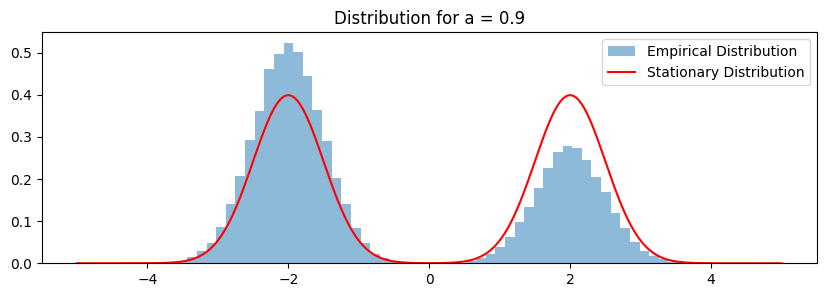

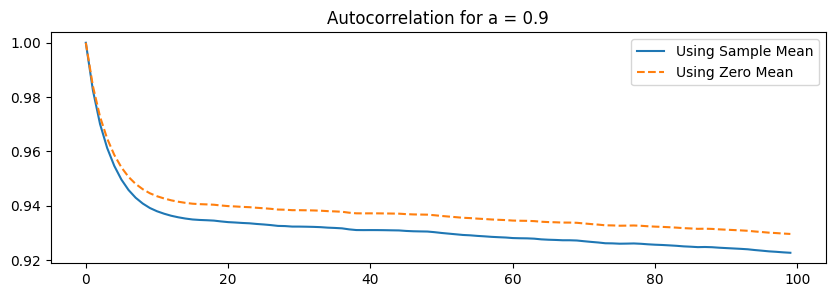

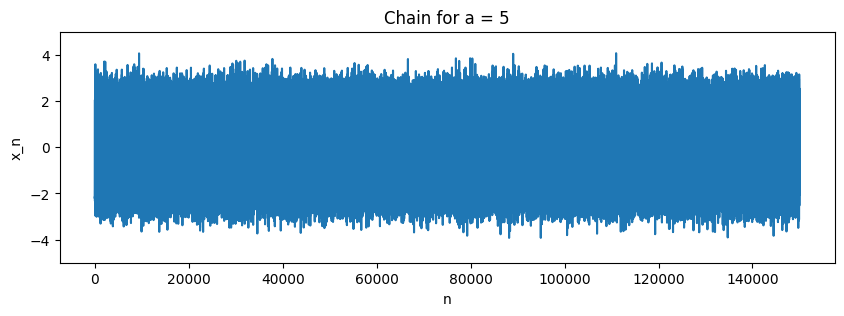

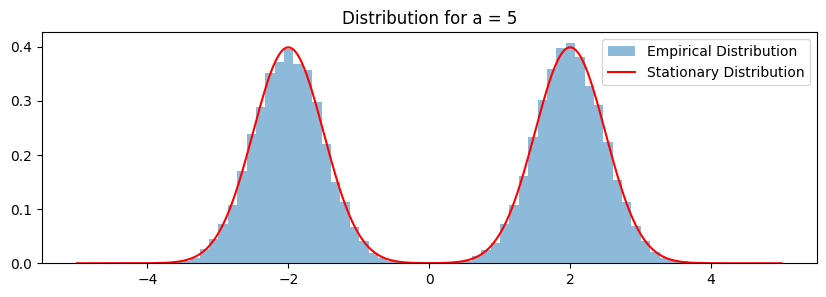

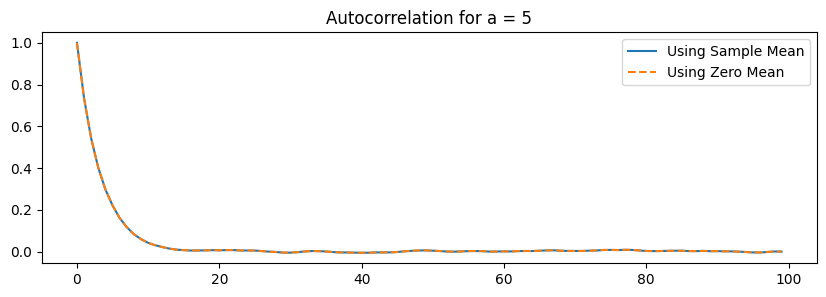

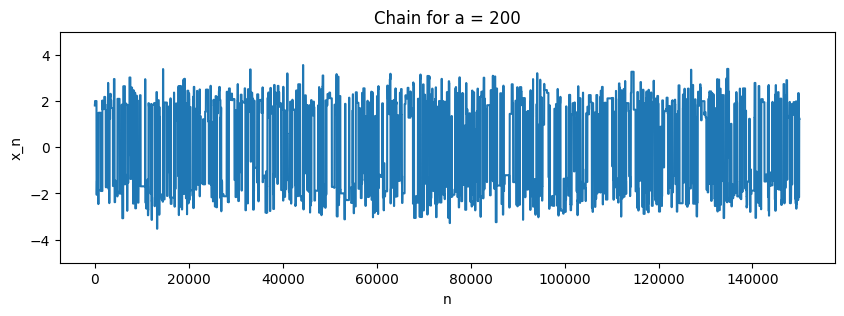

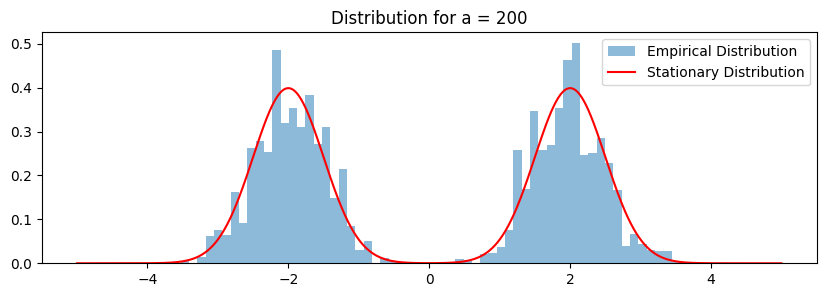

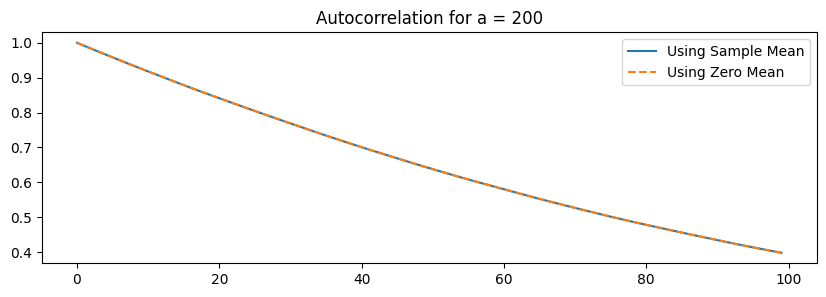

In [3]:

from scipy.stats import norm

# Define the stationary distribution as a mixture of two Gaussian distributions
def pi(x):
    return 0.5 * (norm.pdf(x, loc=-2, scale=0.5) + norm.pdf(x, loc=2, scale=0.5))


def GenerateChain(N, a):
    # Initialize the chain
    chain = np.zeros(N)
    
    # Generate the initial state according to the stationary distribution
    chain[0] = rng.choice([-2, 2]) + rng.normal(0, 0.5)
    
    for i in range(1, N):
        x_current = chain[i-1]
        delta_x = rng.uniform(-a, a)  # Uniform proposal
        x_proposed = x_current + delta_x
        
        # Metropolis criterion
        alpha = min(1, pi(x_proposed) / pi(x_current)) #aha! min() just ensures the probability is never  >1
        
        if rng.random() < alpha:
            chain[i] = x_proposed
        else:
            chain[i] = x_current
            
    return chain




def GeneratePlots(N, a, K):
    # Generate the chain using the GenerateChain function
    chain = GenerateChain(N, a)
    
    # Plot 1: x_n vs n
    plt.figure(figsize=(10, 3))
    plt.plot(chain)
    plt.ylim(-5, 5)
    plt.title(f"Chain for a = {a}")
    plt.xlabel("n")
    plt.ylabel("x_n")
    plt.show()
    
    # Plot 2: Histogram of chain's states
    plt.figure(figsize=(10, 3))
    x = np.linspace(-5, 5, 1000)
    plt.hist(chain, bins=60, density=True, alpha=0.5, label="Empirical Distribution")
    plt.plot(x, pi(x), label="Stationary Distribution", color="red")
    plt.legend()
    plt.title(f"Distribution for a = {a}")
    plt.show()
    
    # Compute the autocorrelation using the provided function
    k_values = np.arange(K)#creates an array 0,...,K
    acf_values = AutoCorrelationFunction(chain, k_values)
    
    tau_x_estimate = np.where(acf_values <= np.exp(-1))[0][0]
    # Plot 3: Autocorrelation
    plt.figure(figsize=(10, 3))
    plt.plot(k_values, acf_values, label="Using Sample Mean")
    
    acf_zero_mean_values = AutoCorrelationFunction(chain, k_values, mean=0)
    plt.plot(k_values, acf_zero_mean_values, label="Using Zero Mean", linestyle="--")
    plt.xlabel("k")
    plt.ylabel("Autocorrelation")
    plt.legend()
    plt.title(f"Autocorrelation for a = {a}; τx Estimate: {tau_x_estimate}")
    

    plt.show()

# Values for N, a_values, and K
N = 150000
a_values = [0.08, 0.9, 5, 200]
K = 100  # An example value, can be adjusted

# An example value, can be adjusted

for a in a_values:
    GeneratePlots(N, a, K)


### Questions

Generate plots for $N=150000$ and $a=0.08,0.9,5,200$, and appropriate values of $K$. Include other values of $a$ if you think it would be useful. Based on your plots, discuss the following:
1. How effective is the chain at exploring the relevant parts of state space over the course of the simulation? Are there indications of an effective breaking of ergodicity, i.e. that the chain gets stuck in regions of state space? How does the choice of $a$ influence this?

If a is very small the chain takes very small steps which can lead to the chain getting stuck at local maxima of $\pi(x)$ and thus breaking ergodicity; on the other hand if a is very large it can lead to many rejected moves which in turn slows down exploration. We see that when $a = 5$ the chain strikes a balance between exploring the state space and the being efficent.

2. How does the behaviour discussed above relate to the decay of the autocorrelation function and the autocorrelation time?

Ideally we want the chain to "forget its past" quickly which is associated with a rapid decay in its autocorrelation, because it ensures that the chain provides effectively independent samples from the target distribution in a computationally efficient manner. For very small and very large values of $a$ we see that the autocorrelation decays slowly, while for $a = 5$ the autocorrelation decays rather quickly. 


3. In the calculation of $\bar{\rho}(k)$, taking $m_N$ as either zero or the sample mean may have a large effect. Why is this? What issue can we run into when using the sample mean if we want to estimate the autocorrelation time?


4. Why do both very small and very large values of $a$ seem to degrade the algorithm's efficiency at sampling according to $\pi(x)$? What are the competing effects here? Which value(s) of $a$ provide a good compromise?

The plots confirm that both very small and very large values of $a$ degrade the efficiency of the Metropolis algorithm. Too small $a$ limits exploration, while too large $a$ leads to many rejected moves. The ideal $a$ would allow effective exploration of both modes without excessive rejected moves. It appears that $a = 5$ provides the best compromise between these two factors.

## Question 2 : The Ehrenfest Model

### Background
Consider the following simple model for particle diffusion. Imagine two connected containers, A and B, containing $M$ particles in total. The system evolves in discrete time steps. At each step, we select one of the particles at random, and move it from its current container to the other container. Since we are not really interested in tracking individual particles we will describe the state of the system simply using $n_A$, the number of particles in container A. The model's state space is therefore $S=\{0,1,2,\ldots,M\}$. If, at a particular time step, there are $n_A \in S$ particles in container A, we move a particle from A to B with probability $n_A/M$, or in the reverse direction with probability $1-n_A/M$. More simply, the system evolves as a Markov chain with transition probabilities $P_{n_A-1\leftarrow n_A}=n_A/M$ and $P_{n_A+1\leftarrow n_A}=1-n_A/M$.

It is easy to show that the stationary distribution of this model is the binomial distribution $$\pi(n_A)=\frac{1}{2^M} {M\choose n_A}.$$ The expectation value of $n_A$ with respect to this distribution is $E_\pi(n_A)=M/2$, as one would expect, since the particles should, on average, be divided evenly between the containers when the system is in equilibrium. Suppose we want to estimate this expectation value using the time-average of $n_A$ over the system's first $N$ steps. In class it was claimed that, under certain conditions, the mean squared error of this estimate would be $${\rm MSE}=\frac{{\rm var}_\pi(n_A)}{N}(2\tau),$$
which is larger than the MSE of the direct Monte Carlo approach by a factor of $2\tau$, with $\tau$ the autocorrelation time of $n_A$. This was an approximate result. For this simple model the mean squared error can be calculated exactly. It is found that 
$${\rm MSE}=\frac{{\rm var}_\pi(n_A)}{N}(M-1),$$
which suggests that the autocorrelation time is about $\tau\approx M/2$. The expression above means that the effective sample size is $N_{\rm eff}=N/(M-1)$. In other words, due to the correlations between our data points, our sample is effectively $(M-1)$ times smaller than it would be if we were generating independent realization of $n_A$ according to $\pi$.

Finally, we note that ${\rm var}_\pi(n_A)=M/4$, which is a standard result for the binomial distribution.

### Coding Instructions

Very similar to what you did in Question 1, so recycle where possible.

**GenerateChainEhrenfest(N,M):** This simulates the Ehrenfest model with $M$ particles for $N$ steps, starting from a state generated according to the stationary distribution.

**AutoCorrelationFunction(x,klist,mean)**: Can be used again as is.

**GeneratePlotsEhrenfest(N,M,K):** Generates the same plots as for Question 1, with some minor modifications.

**DirectMonteCarlo(N,M):** Returns an estimate for $E_\pi(n_A)$ based on an iid sample of size $N$ generated using the stationary distribution. (Should be a one-liner.)

**MarkovChainMonteCarlo(N,M):** Returns an estimate for $E_\pi(n_A)$ using the output from GenerateChainEhrenfest(N,M). (Should be a one-liner.)


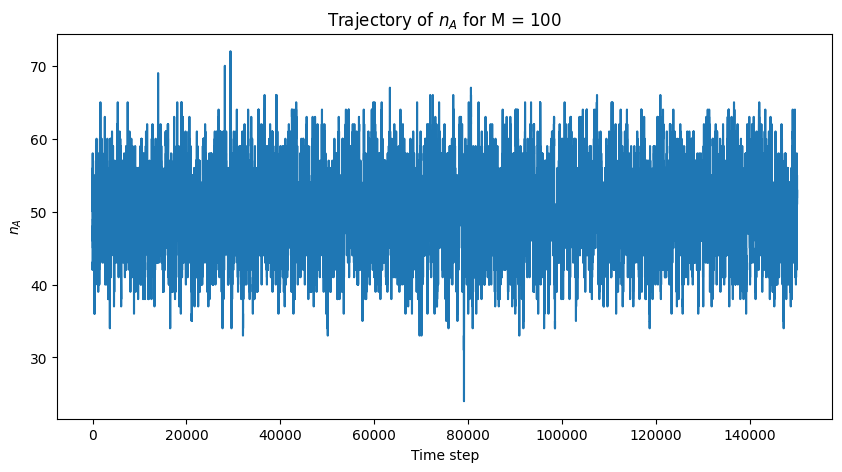

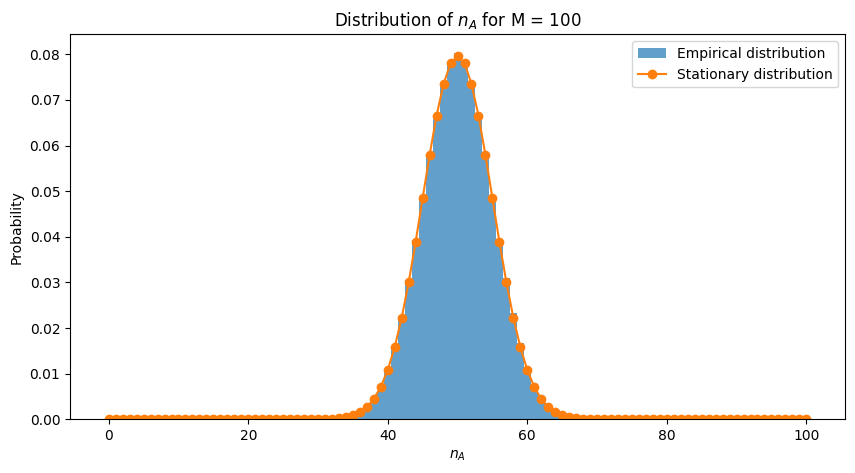

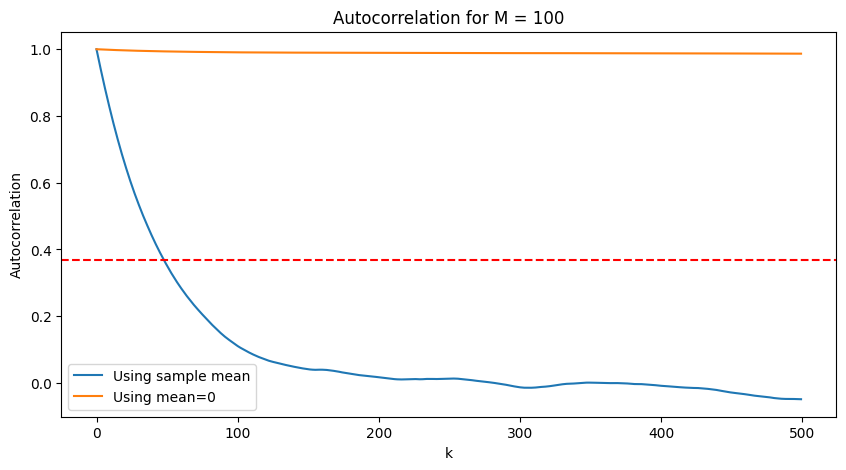

MSE for Direct Monte Carlo: 0.013358481750000003
MSE for Markov Chain Monte Carlo: 1.146031852


In [9]:
from scipy.stats import binom as binom_stats
M=100
def GenerateChainEhrenfest(N, M):
    # Initialize the chain with a random state generated according to the stationary distribution
    chain = [rng.binomial(M, 0.5)] # Starts with a number of particles in A based on binomial distribution

    for _ in range(1, N):
        n_A = chain[-1]
        # Probability to move a particle from A to B
        prob_move_A_to_B = n_A / M

        if rng.random() < prob_move_A_to_B:
            chain.append(n_A - 1)
        else:
            chain.append(n_A + 1)

    return np.array(chain)

def DirectMonteCarlo(N, M):
    return np.mean(rng.binomial(M, 0.5, size=N))

def MarkovChainMonteCarlo(N, M):
    chain = GenerateChainEhrenfest(N, M)
    return np.mean(chain)


def GeneratePlotsEhrenfest(N, M, K):
    chain = GenerateChainEhrenfest(N, M)
    
    # Plot 1: Trajectory
    plt.figure(figsize=(10, 5))
    plt.plot(chain)
    plt.title(f'Trajectory of $n_A$ for M = {M}')
    plt.xlabel('Time step')
    plt.ylabel('$n_A$')
    plt.show()

    # Plot 2: Histogram
    plt.figure(figsize=(10, 5))
    plt.hist(chain, bins=np.arange(-0.5, M+1.5), density=True, alpha=0.7, label="Empirical distribution")
    x = np.arange(M+1)
    plt.plot(x, binom_stats.pmf(x, M, 0.5), 'o-', label="Stationary distribution")

    plt.title(f'Distribution of $n_A$ for M = {M}')
    plt.xlabel('$n_A$')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

    # Plot 3: Autocorrelation
    klist = np.arange(K)
    acf = AutoCorrelationFunction(chain, klist)
    plt.figure(figsize=(10, 5))
    plt.plot(klist, acf, label="Using sample mean")
    plt.plot(klist, AutoCorrelationFunction(chain, klist, mean=0), label="Using mean=0")
    plt.axhline(y=np.exp(-1), color='r', linestyle='--')
    plt.title(f'Autocorrelation for M = {M}')
    plt.xlabel('k')
    plt.ylabel('Autocorrelation')
    plt.legend()
    plt.show()

# Example usage
GeneratePlotsEhrenfest(150000, M, 500)



#Question 2

N = 2000
num_estimates = 1000

direct_estimates = [DirectMonteCarlo(N, M) for _ in range(num_estimates)]
markov_estimates = [MarkovChainMonteCarlo(N, M) for _ in range(num_estimates)]

# Calculate the mean squared error (MSE) for each approach
expected_value = M / 2  # As given by the stationary distribution
mse_direct = np.mean((np.array(direct_estimates) - expected_value)**2)  
mse_markov = np.mean((np.array(markov_estimates) - expected_value)**2)

print(f"MSE for Direct Monte Carlo: {mse_direct}")
print(f"MSE for Markov Chain Monte Carlo: {mse_markov}")


### Questions

Set $M=100$. 
1. Generate plots for $N=150000$. How does your estimate for the autocorrelation time compare to the prediction that $\tau\approx M/2$?
2. For $N=2000$ use DirectMonteCarlo(N,M) and MarkovChainMonteCarlo(N,M) to generate a large number of independent estimates for $E_\pi(n_A)$. Calculate the mean squared error of these estimates for each approach, and compare your results to the predictions above.